## The Percepton 
Using Python Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)

`What is the dot after 0` \
`What is a floating pont number?`\
`How do you fo flo`\
`If you don't care about precision and space you can use the 32 bit float`


In [3]:
y = np.array([0,0,0,1], dtype = int)

`The 0 with no decimal means integer`

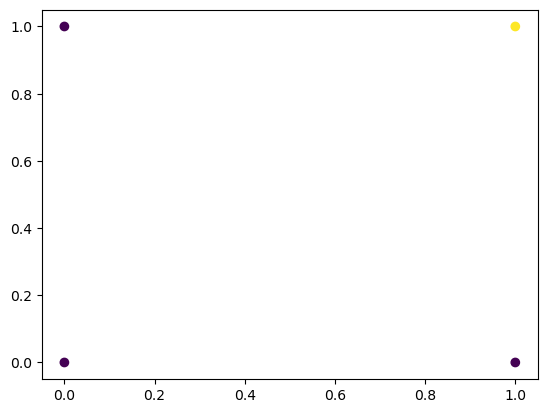

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y)

In [5]:
# Repeat the numbers from x1, x2 and y 50 times each
# For example for x1, each element of x1 will be repeated 50 times, so there will be 200 sample points at the end of it
x1 = np.repeat(x1, 50) # This is a vector/aray
x2 = np.repeat(x2, 50) # This is a vector/aray
y = np.repeat(y, 50) # This is a vector/aray

In [6]:
# Add random noise to data points

x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

x1

array([1.78880460e-03, 3.89597137e-02, 2.01736286e-02, 3.19566129e-02,
       2.31873302e-02, 1.02980448e-02, 3.76637387e-02, 5.84879420e-03,
       4.21000279e-02, 4.62811868e-02, 1.02347898e-02, 2.02799807e-02,
       2.49447641e-02, 9.57272104e-03, 4.50101411e-02, 2.32375519e-02,
       5.59734220e-03, 2.66971897e-02, 2.37706477e-02, 4.06879122e-02,
       3.01054695e-02, 4.18085054e-02, 2.36520671e-02, 9.32010855e-03,
       6.63350531e-03, 2.32131615e-02, 2.70084737e-02, 4.81024332e-02,
       1.32591751e-02, 4.86623035e-02, 4.73322212e-02, 3.20728276e-02,
       2.44497841e-02, 5.67870483e-03, 2.24090516e-02, 1.56886915e-02,
       4.69666387e-02, 2.66788177e-02, 2.18525247e-03, 3.14728306e-02,
       3.25458846e-02, 1.32845644e-02, 2.16800973e-02, 2.36876490e-02,
       1.84582505e-02, 2.09972721e-02, 1.01177943e-02, 4.65416434e-02,
       5.41444770e-04, 3.44904305e-02, 2.14649022e-02, 8.33477712e-03,
       2.37441923e-02, 2.99175366e-02, 2.69886899e-02, 1.92124524e-02,
      

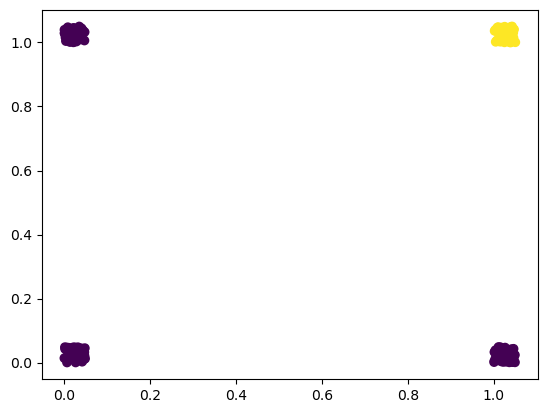

In [7]:
plt.scatter(x1, x2, c = y)

In [8]:
# Combine x1 and x2
X = np.column_stack((x1, x2))

In [9]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 2)
y shape:  (200,)


In [10]:
# Diffusion
# We need to shuffle the index
# Generate indexes from 0 to 199
shuffle_idx = np.arange(y.shape[0])

In [11]:
# Random number generator with a seed
# It is not trully random, but just a pseudo-random
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)

print('Shuffles Indices: ', shuffle_idx)

Shuffles Indices:  [ 95  15  30 158 128 115  69 170 174  45  66 182 165  78 186 177  56 152
  82  68 124  16 148  93  65  60  84  67 125 132   9  18  55  75 150 104
 135 137 164  76  79 197  38  24 122 195  29  19 143  86 114 173   5 126
 117  73 140  98 172  96 169  97  31  12  35 119  42 189  90 136  51 127
 162  41 118 113  26 139 100 111   2  77  46 187 191  85 161  36 190  61
  22 141 101  33  11 194 159   6  27 120   4  32 142 145 109 144  10  62
 112 146 166   0 198 153  70 123  64  44 163  28  40 108 155 156  25  23
 184 147  81  39 168  47  94 154  43 138   3 105  53 133 180 178 185  49
  80  34   7 110  91  83 176 181  89   8  13  59 171 131  17  72 175 134
 167 183  63  54 107  50 196  58  48  88  21  57 160 192 129  37 157 193
   1  52 149 130 151 103  99 116  87  74 121 199  20 188  71 106  14  92
 179 102]


In [12]:
X, y = X[shuffle_idx], y[shuffle_idx]
# ???? What does this syntax do

split_point = int(0.7 * X.shape[0])

X_train, X_test = X[shuffle_idx[:split_point]], X[shuffle_idx[split_point:]] 
# ??? What is this colon notation
y_train, y_test = y[shuffle_idx[:split_point]], y[shuffle_idx[split_point:]]

In [13]:
# Normalisation (zero mean, unit variance)
# When axis is 0, you are doing an operation across rows. When doing axis = 1, it is an operation across columns
# We only need the mean and variance for the training data set because is the one used by the machine to learn
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

print('zero mean: ', mu)
print('unit variance(standard deviation): ', sigma)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) /sigma

zero mean:  [0.4876429  0.53377461]
unit variance(standard deviation):  [0.49884109 0.49900665]


In [14]:
np.zeros((3,1), dtype = float)

array([[0.],
       [0.],
       [0.]])

In [15]:
class Perceptron():
    def _init_(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeroes((1,), dtype = float)

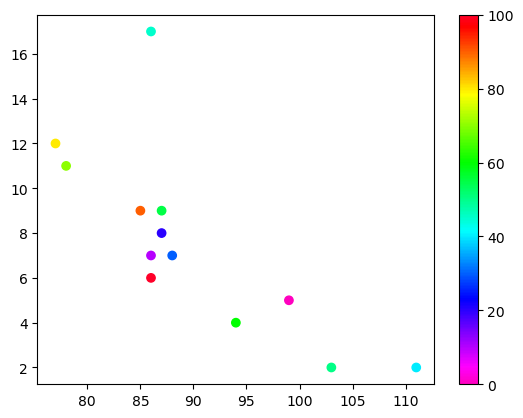

In [35]:
a = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
b = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

colors = [0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100]

plt.scatter(b, a, c=colors, cmap='gist_rainbow_r')
plt.colorbar()

plt.show()